In [14]:
import numpy as np  # works with arrays
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv) #reads dataset

filepath = r"C:\miniproject\indian_liver_patient.csv"
data = pd.read_csv(filepath)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease 167
Percentage of patients likely to have liver disease71.35506003430532%


<AxesSubplot:xlabel='Dataset', ylabel='count'>

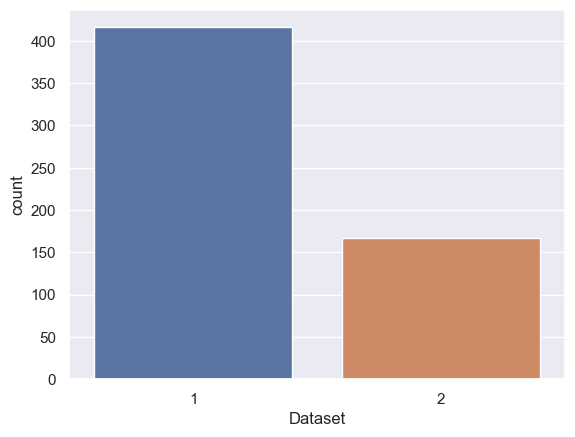

In [15]:
import seaborn as sns

n_records = len(data)
n_records_liv_pos = len(data[data["Dataset"] == 1])
n_records_liv_neg = len(data[data["Dataset"] == 2])
percent_liver_disease_pos = (n_records_liv_pos / n_records) * 100
print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease {}".format(n_records_liv_neg))
print(
    "Percentage of patients likely to have liver disease{}%".format(
        percent_liver_disease_pos
    )
)
sns.countplot(data=data, x="Dataset", label="Count")

<AxesSubplot:title={'center':'Features vs mean values'}>

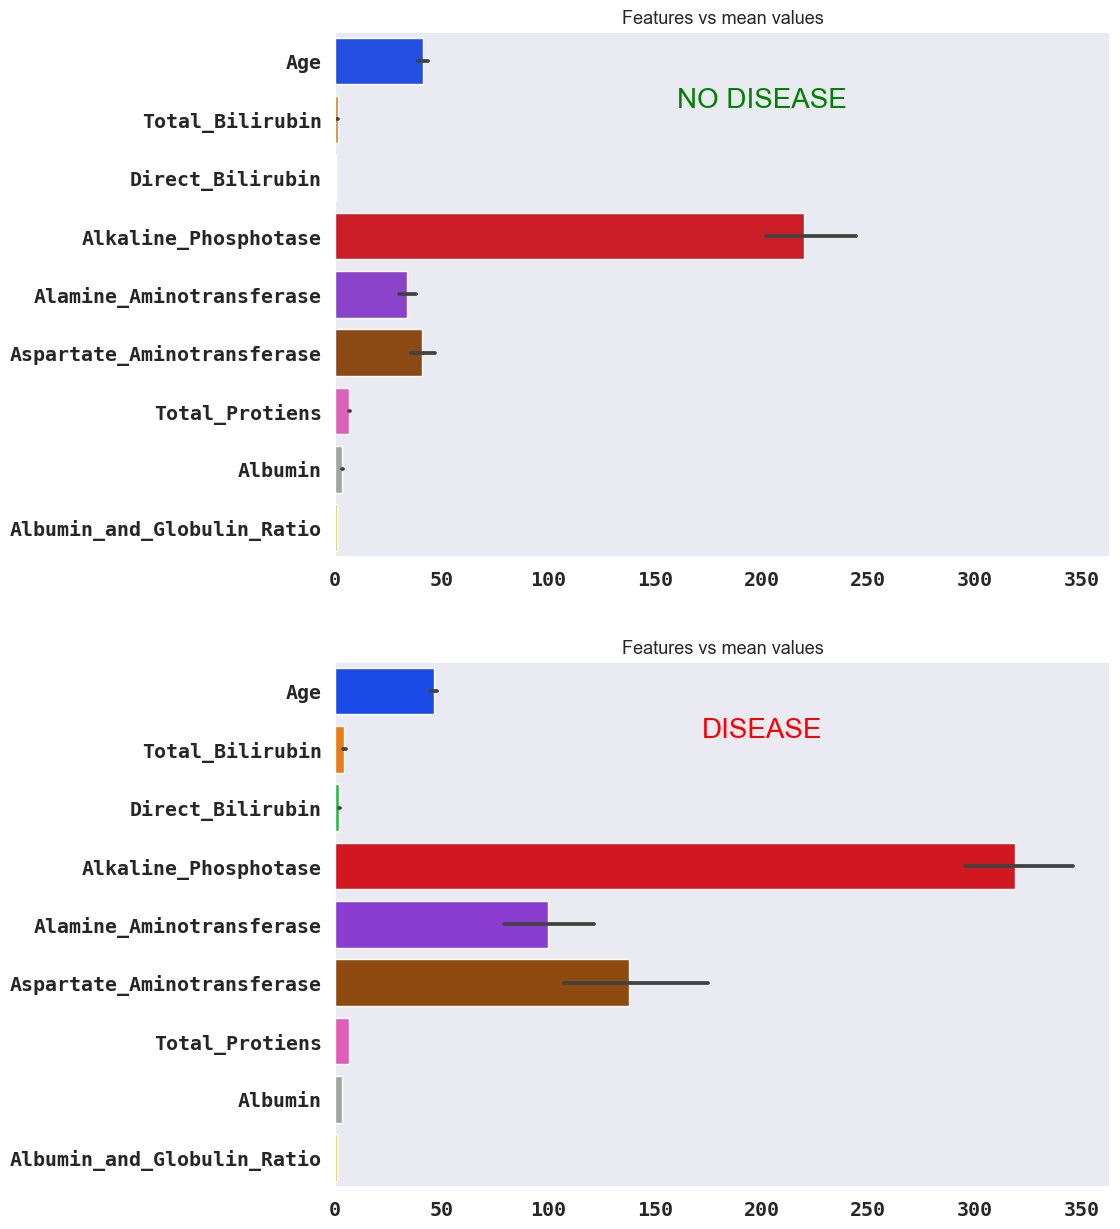

In [16]:
from matplotlib import pyplot as plt #used fir visualize the data

import seaborn as sns #to plot bar graph

# Visualizing the features of each category of people (healthy/unhealthy)
data1 = data[data["Dataset"] == 2]  # no disease
data1 = data1.iloc[:, :-1]
data2 = data[data["Dataset"] == 1]  # with disease
data2 = data2.iloc[:, :-1]
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)
ax1.grid()
ax2.grid()
ax1.set_title("Features vs mean values", fontsize=13)
ax1.text(
    200, 0.8, "NO DISEASE", fontsize=20, horizontalalignment="center", color="green"
)
ax2.set_title("Features vs mean values", fontsize=13)
ax2.text(200, 0.8, "DISEASE", fontsize=20, horizontalalignment="center", color="red")
# for axis ax1
plt.sca(ax1)
plt.xticks(rotation=0, weight="bold", family="monospace", size="large")
plt.yticks(weight="bold", family="monospace", size="large")
# for axis ax2
plt.sca(ax2)
plt.xticks(rotation=0, weight="bold", family="monospace", size="large")
plt.yticks(weight="bold", family="monospace", size="large")
sns.barplot(data=data1, ax=ax1, orient="horizontal", palette="bright")  # no disease
sns.barplot(
    data=data2, ax=ax2, orient="horizontal", palette="bright", saturation=0.80
)

Text(0, 0.5, 'Mean Values')

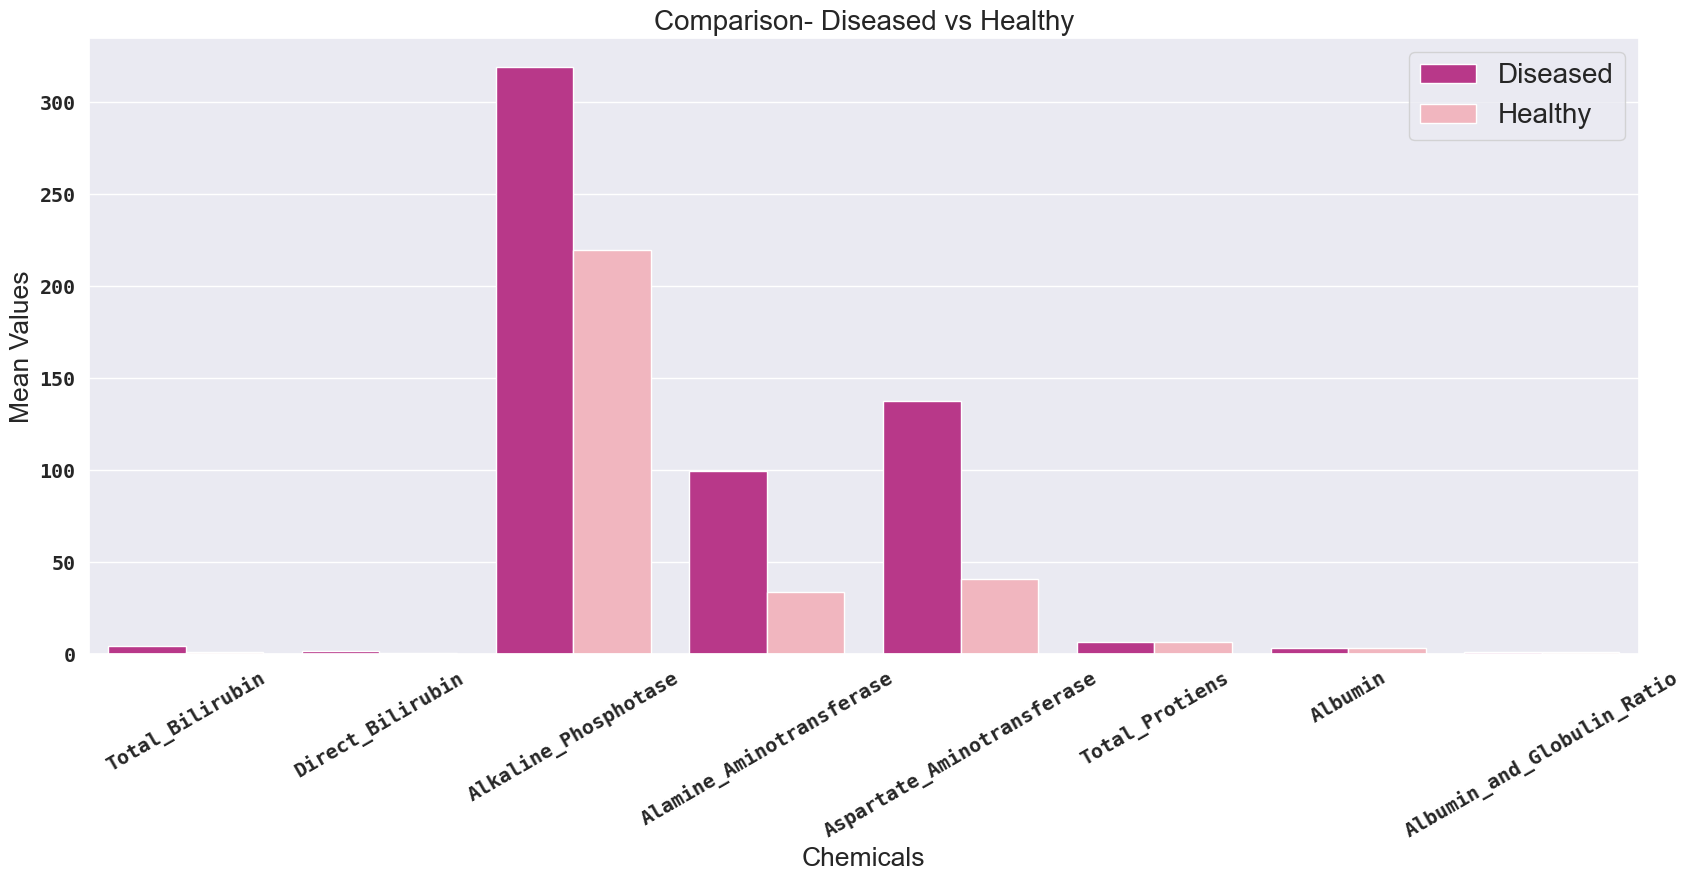

In [17]:
 # with disease
# Visualizing the differences in chemicals in Healthy/Unhealthy people
with_disease = data[data["Dataset"] == 1]
with_disease = with_disease.drop(columns=["Gender", "Age", "Dataset"])
names1 = with_disease.columns.unique()
mean_of_features1 = with_disease.mean(axis=0, skipna=True)
without_disease = data[data["Dataset"] == 2]
without_disease = without_disease.drop(columns=["Gender", "Age", "Dataset"])
names2 = without_disease.columns.unique()
mean_of_features2 = without_disease.mean(axis=0, skipna=True)
people = []

for x, y in zip(names1, mean_of_features1):
    people.append([x, y, "Diseased"])
for x, y in zip(names2, mean_of_features2):
    people.append([x, y, "Healthy"])

new_data = pd.DataFrame(people, columns=["Chemicals", "Mean_Values", "Status"])
fig = plt.figure(figsize=(20, 8))
plt.title("Comparison- Diseased vs Healthy", size=20, loc="center")
plt.xticks(rotation=30, weight="bold", family="monospace", size="large")
plt.yticks(weight="bold", family="monospace", size="large")
g1 = sns.barplot(
    x="Chemicals", y="Mean_Values", hue="Status", data=new_data, palette="RdPu_r"
)
plt.legend(prop={"size": 20})
plt.xlabel("Chemicals", size=19)
plt.ylabel("Mean Values", size=19)

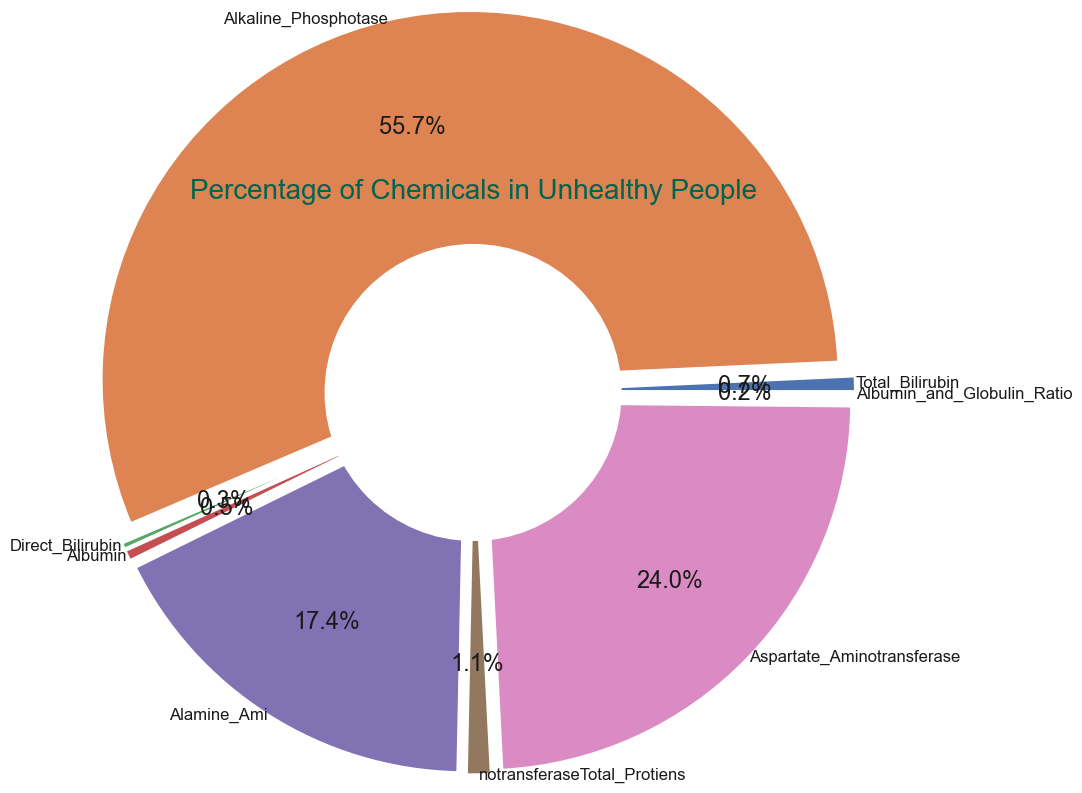

Text(0, 0.04, 'Female')

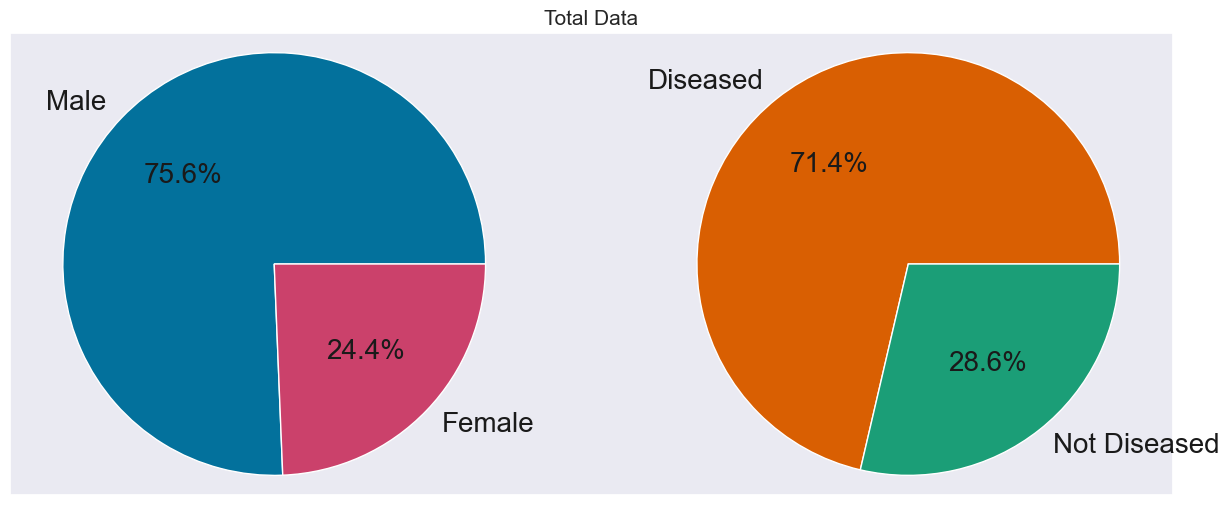

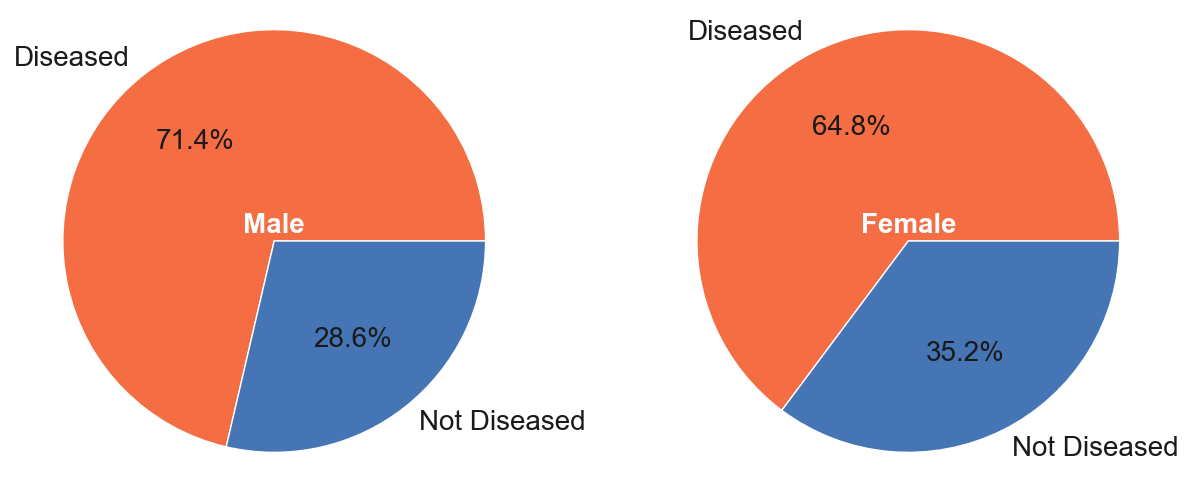

In [18]:
# new data
# Create data
# Percentage of Chemicals in Unhealthy People
with_disease = data[data["Dataset"] == 1]
with_disease = with_disease.drop(columns=["Dataset", "Gender", "Age"])
names = with_disease.columns.unique()
mean_of_features = with_disease.mean(axis=0, skipna=True)
# The goal was to arrange numbers in such a way that numbers that are very small compared to
# that is the smaller numbers be embedded between larger numbers
# used for visualization of pie chart clearly.
list_names = [
    "Total_Bilirubin",
    "Alkaline_Phosphotase",
    "Direct_Bilirubin",
    "Albumin",
    "Alamine_Ami",
    "notransferase" "Total_Protiens",
    "Aspartate_Aminotransferase",
    "Albumin_and_Globulin_Ratio",
]
list_means = [
    4.164423076923075,
    319.00721153846155,
    1.923557692307693,
    3.0605769230769226,
    99.60576923076923,
    6.459134615384617,
    137.69951923076923,
    0.9141787439613527,
]
l_names = []
l_means = []
mydict = {}
for x, y in zip(names, mean_of_features):
    mydict[x] = y
    l_names.append(x)
    l_means.append
# Other statistics of dataset
fig = plt.figure()
plt.title("Percentage of Chemicals in Unhealthy People", size=20, color="#016450")
# Create a pieplot
plt.axis("equal")
explode = (0.09,) * (len(list_means))
color_pink = [
    "#7a0177",
    "#ae017e",
    "#dd3497",
    "#f768a1",
    "#fa9fb5",
    "#fcc5c0",
    "#fde0dd",
    "#fff7f3",
]
wedges, texts, autotexts = plt.pie(
    list_means,
    explode=explode,
    labels=list_names,
    labeldistance=1,
    textprops=dict(color="k"),
    radius=2.5,
    autopct="%1.1f%%",
    pctdistance=0.7,
    wedgeprops={"linewidth": 3, "edgecolor": "white"},
)
plt.setp(autotexts, size=17)
plt.setp(texts, size=12)
# Add a circle at the center
my_circle = plt.Circle((0, 0), 1, color="white")
p = plt.gcf()  # get current figure reference
p.gca().add_artist(my_circle)  # get current axes
plt.show()

# Male vs Female statistics
fig = plt.figure(
    figsize=(15, 6), frameon=False
)  # I don't know why figure boundary is still visible
plt.title("Total Data", loc="center", weight=10, size=15)
plt.xticks([])  # to disable xticks
plt.yticks([])  # to disable yticks
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
only_gender = data["Gender"]
male_tot = only_gender[only_gender == "Male"]
no_of_male = len(male_tot)
no_of_female = len(data) - len(male_tot)
m_vs_f = [no_of_male, no_of_female]
with_disease = data[data["Dataset"] == 1]
not_with_disease = data[data["Dataset"] == 2]
with_disease = with_disease["Gender"]
no_of_diseased = len(with_disease)
no_of_not_diseased = len(data) - len(with_disease)
d_vs_healthy = [no_of_diseased, no_of_not_diseased]
# you can force the x and y axes to have equal number of pixels per data unit.
# This is done using the plt.axis("equal") or ax.axis("equal") methods
# (where ax is an instance of an Axes).
ax1.axis("equal")
ax2.axis("equal")
# pie plot
wedges, texts, autotexts = ax1.pie(
    m_vs_f,
    labels=("Male", "Female"),
    radius=1,
    textprops=dict(color="k"),
    colors=["xkcd:ocean blue", "xkcd:dark pink"],
    autopct="%1.1f%%",
)
# pie plot
wedges2, texts2, autotexts2 = ax2.pie(
    d_vs_healthy,
    labels=("Diseased", "Not Diseased"),
    radius=1,
    textprops=dict(color="k"),
    colors=["#d95f02", "#1b9e77"],
    autopct="%1.1f%%",
)
plt.setp(autotexts, size=20)
plt.setp(texts, size=20)
plt.setp(autotexts2, size=20)
plt.setp(texts2, size=20)
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
with_disease = data[data["Dataset"] == 1]
not_with_disease = data[data["Dataset"] == 2]
with_disease_m = with_disease[with_disease["Gender"] == "Male"]
with_disease_m = with_disease["Gender"]
not_with_disease_m = not_with_disease[not_with_disease["Gender"] == "Male"]
not_with_disease_m = not_with_disease["Gender"]
with_disease_f = with_disease[with_disease["Gender"] == "Female"]
not_with_disease_f = not_with_disease[not_with_disease["Gender"] == "Female"]
no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)
no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)
d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]
ax1.axis("equal")
ax2.axis("equal")
# pie plot

wedges, texts, autotexts = ax1.pie(
    d_vs_healthy_m,
    labels=("Diseased", "Not Diseased"),
    radius=1,
    textprops=dict(color="k"),
    colors=["#f46d43", "#4575b4"],
    autopct="%1.1f%%",
)
wedges2, texts2, autotexts2 = ax2.pie(
    d_vs_healthy_f,
    labels=("Diseased", "Not Diseased"),
    radius=1,
    textprops=dict(color="k"),
    colors=["#f46d43", "#4575b4"],
    autopct="%1.1f%%",
)
plt.setp(autotexts, size=20)
plt.setp(texts, size=20)
plt.setp(autotexts2, size=20)
plt.setp(texts2, size=20)
ax1.text(
    0,
    0.04,
    "Male",
    size=20,
    color="#f7fcfd",
    horizontalalignment="center",
    weight="bold",
)
ax2.text(
    0,
    0.04,
    "Female",
    size=20,
    color="#f7fcfd",
    horizontalalignment="center",
    weight="bold",
)


In [19]:
# Machine Learning
# We need to separate the target values from the rest of the table
X = data.iloc[:, :-1].values
t = data.iloc[:, -1].values
# Label encoding¶
# Output variable (target)
# 1 means having liver disease
# 2 means not having liver disease
# We need to convert all 2's into zeroes for confusion-matrix calculations
for u in range(len(t)):
    if t[u] == 2:
        t[u] = 0
# Gender column has entries as Male and Female. For a mathematical model to learn, we have to
# encode these into numbers.

from sklearn.preprocessing import LabelEncoder #package used for data mining and machine learning

lbl = LabelEncoder() #converts code into machine level language
X[:, 1] = lbl.fit_transform(X[:, 1])
# Fill the missing rows with values
data["Albumin_and_Globulin_Ratio"].isnull().sum()
# Let's check how many entries have a NaN (Not a Number) or missing values
missing_values_rows = data[data.isnull().any(axis=1)]
print(missing_values_rows)


     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        0  
312      4.8        

In [20]:
# Machine Learning
# We need to separate the target values from the rest of the table
X = data.iloc[:, :-1].values
t = data.iloc[:, -1].values
# Label encoding¶
# Output variable (target)
# 1 means having liver disease
# 2 means not having liver disease
# We need to convert all 2's into zeroes for confusion-matrix calculations
for u in range(len(t)):
    if t[u] == 2:
        t[u] = 0
# Gender column has entries as Male and Female. For a mathematical model to learn, we have to
# encode these into numbers.

from sklearn.preprocessing import LabelEncoder #package used for data mining and machine learning

lbl = LabelEncoder() #converts code into machine level language
X[:, 1] = lbl.fit_transform(X[:, 1])
# Fill the missing rows with values
data["Albumin_and_Globulin_Ratio"].isnull().sum()
# Let's check how many entries have a NaN (Not a Number) or missing values
missing_values_rows = data[data.isnull().any(axis=1)]
print(missing_values_rows)
# Here we fill it by mean of the values of that corresponding column
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
X[:, 9:10] = imputer.fit_transform(X[:, 9:10])
from sklearn.model_selection import train_test_split

# Training and Testing data¶
# Let's partition our dataset into training data and testing data
# Here, we keep 25% data as testing data.
# training data
X_train, X_test, t_train, t_test = train_test_split(
    X, t, random_state=99, test_size=0.05
)
# Feature Scaling
# Standardisation is applied to all rows of all columns except the age and the gender column.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])
# Importing Model Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Traning and Predictions¶
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# creating object of LogisticRegression class
classifier_logis = LogisticRegression(random_state=50)
# fitting the model/ training the model on training data (X_train,t_train)
classifier_logis.fit(X_train, t_train)
# predicting whether the points (people/rows) in the test set (X_test) have the liver disease or not
y_pred_logis = classifier_logis.predict(X_test)
# model performance by confusion-matrix
cm_logis = confusion_matrix(t_test, y_pred_logis)
print(cm_logis)
# accuracy-result of LogisticRegression model
accuracy_logis = accuracy_score(t_test, y_pred_logis)
print("The accuracy of LogisticRegression is: ", str(accuracy_logis * 100), "%")
logreg_score = round(classifier_logis.score(X_train, t_train) * 100, 2)
print("Logistic Regression Training Score is:", logreg_score)
print(classification_report(t_test, y_pred_logis))


     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
209      3.9                         NaN        1  
241      3.1                         NaN        1  
253      2.7                         NaN        0  
312      4.8        

In [21]:
# Support Vector Machine
from sklearn.svm import SVC
import seaborn as sns
# creating object of SVC class
classifier_svc = SVC(kernel="rbf", random_state=50, gamma="auto")
# Fitting the model/ training the model on training data (X_train,t_train)
classifier_svc.fit(X_train, t_train)
# Predicting whether the points in the test set (X_test) have the liver disease or not
y_pred_svc = classifier_svc.predict(X_test)
# model performance by confusion-matrix
cm_svc = confusion_matrix(t_test, y_pred_svc)
print(cm_svc)
# accuracy-result of SVC model
accuracy_svc = accuracy_score(t_test, y_pred_svc)
print("The accuracy of SupportVectorClassification is: ", str(accuracy_svc * 100), "%")
svc_score = round(classifier_svc.score(X_train, t_train) * 100, 2)
print("Support Vector Machine Training Score is:", svc_score)
print(classification_report(t_test, y_pred_logis))


[[ 0  6]
 [ 0 24]]
The accuracy of SupportVectorClassification is:  80.0 %
Support Vector Machine Training Score is: 70.89
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.85      0.92      0.88        24

    accuracy                           0.80        30
   macro avg       0.67      0.62      0.64        30
weighted avg       0.78      0.80      0.78        30



In [22]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# creating object of RandomForestClassifier class
classifier_rfc = RandomForestClassifier(
    n_estimators=50, criterion="entropy", random_state=100
)
# Fitting the model/ training the model on training data (X_train,t_train)
classifier_rfc.fit(X_train, t_train)
# Predicting whether the points in the test set (X_test) have the liver disease or not
y_pred_rfc = classifier_rfc.predict(X_test)

# evaluating model performance by confusion-matrix
cm_rfc = confusion_matrix(t_test, y_pred_rfc)
print(cm_rfc)
print(classification_report(t_test, y_pred_logis))
# Accuracy-result of RandomForestClassifier model
accuracy_rfc = accuracy_score(t_test, y_pred_rfc)
print("The accuracy of RandomForestClassifier is : ", str(accuracy_rfc * 100), "%")
rfc_score = round(classifier_rfc.score(X_train, t_train) * 100, 2)


[[ 4  2]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.85      0.92      0.88        24

    accuracy                           0.80        30
   macro avg       0.67      0.62      0.64        30
weighted avg       0.78      0.80      0.78        30

The accuracy of RandomForestClassifier is :  90.0 %


In [23]:
print("Support Vector Machine Training Score is:", rfc_score)
from sklearn.metrics import precision_score
precision_score=precision_score(t_test,y_pred_rfc)
print("precision_score is:",str(precision_score * 100), "%")

from sklearn.metrics import f1_score
f1_score=f1_score(t_test,y_pred_rfc)
print("f1_score is:",str(f1_score * 100), "%")

from sklearn.metrics import recall_score
recall_score=recall_score(t_test,y_pred_rfc)
print("recall_score is:",str(recall_score * 100), "%")


Support Vector Machine Training Score is: 100.0
precision_score is: 92.0 %
f1_score is: 93.87755102040816 %
recall_score is: 95.83333333333334 %


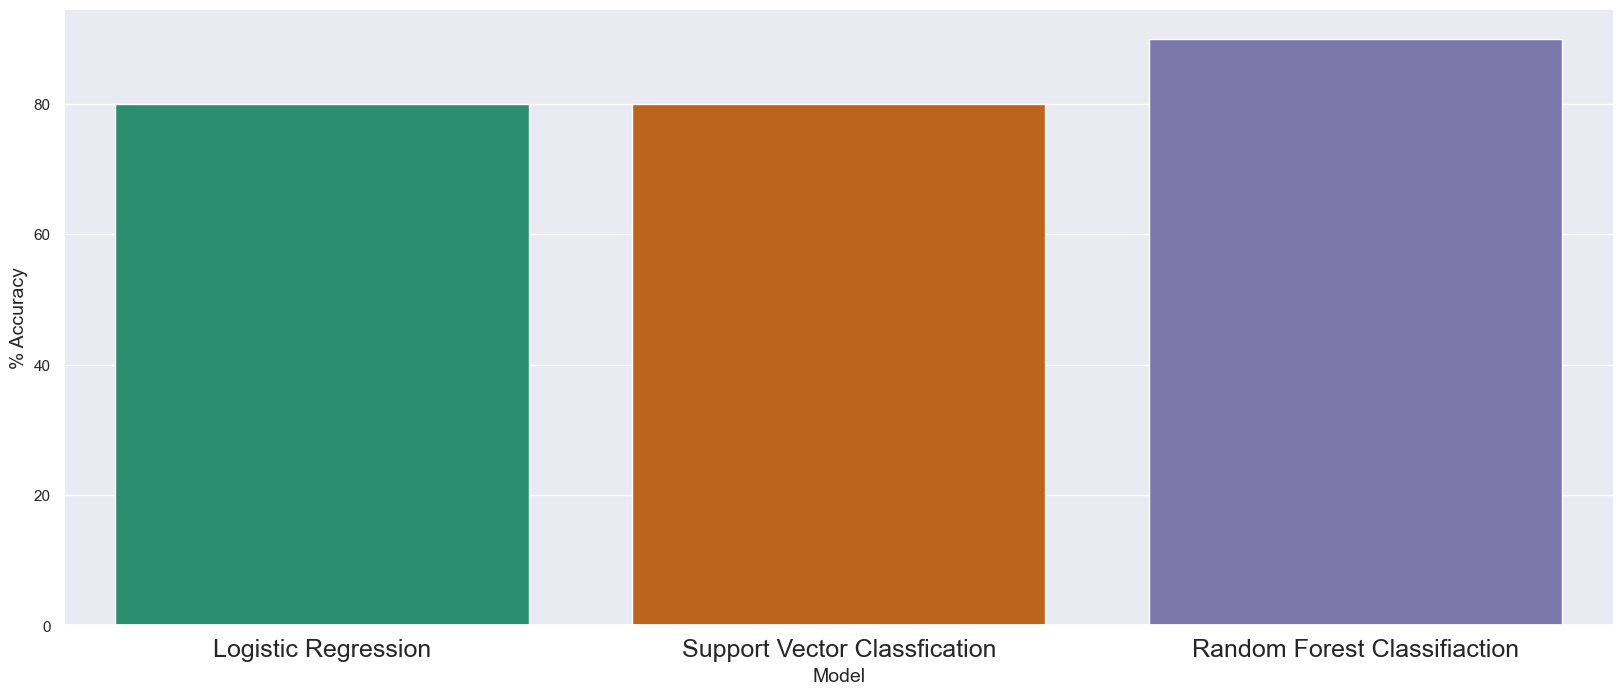

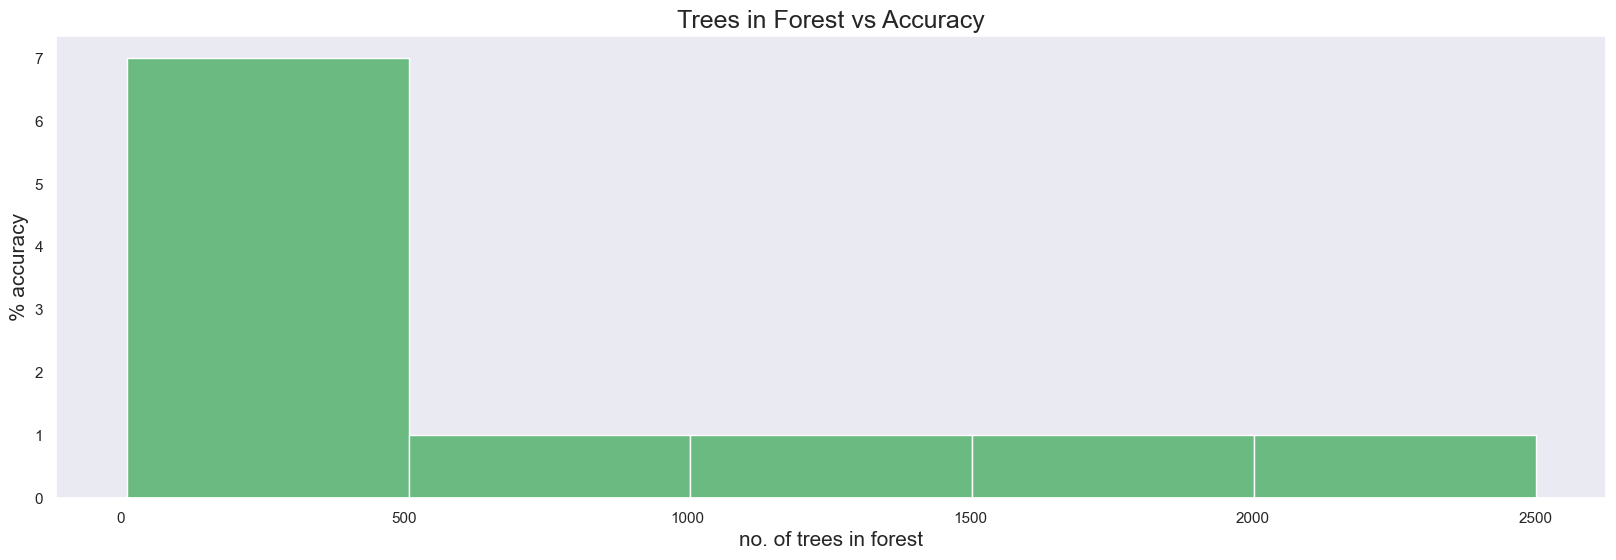

In [24]:
# Comparing Model Performance
models_comparison = [
    ["Logistic Regression", accuracy_logis * 100],
    ["Support Vector Classfication", accuracy_svc * 100],
    ["Random Forest Classifiaction", accuracy_rfc * 100],
]
models_compaison_df = pd.DataFrame(models_comparison, columns=["Model", "% Accuracy"])
models_compaison_df.head()
fig = plt.figure(figsize=(20, 8))
sns.set()
sns.barplot(x="Model", y="% Accuracy", data=models_compaison_df, palette="Dark2")
plt.xticks(size=18)
plt.ylabel("% Accuracy", size=14)
plt.xlabel("Model", size=14)
# Analysing the effect of number of trees in Random forest to its accuracy¶
def n_trees_acc(n):
    def n_trees_acc(n):
        classifier_rfc = RandomForestClassifier(
            n_estimators=n, criterion="entropy", random_state=100
        )
        classifier_rfc.fit(X_train, t_train)
        y_pred_rfc = classifier_rfc.predict(X_test)
        accuracy_rfc = accuracy_score(t_test, y_pred_rfc)
        return accuracy_rfc * 100


n_trees = [10, 50, 100, 200, 250, 400, 500, 1000, 1500, 2000, 2500]
n_trees_acc_score = list(map(n_trees_acc, n_trees))
#print(n_trees_acc_score)
d1 = []
for (x, y) in zip(n_trees, n_trees_acc_score):
    d1.append([x, y])

d2 = pd.DataFrame(d1, columns=["no. of trees in forest", "% accuracy"])
fig = plt.figure(figsize=(20, 6))
sns.histplot(x="no. of trees in forest", y="% accuracy", data=d2, color="#41ab5d")
plt.title("Trees in Forest vs Accuracy", size=18)
plt.xlabel("no. of trees in forest", size=15)
plt.ylabel("% accuracy", size=15)
plt.grid()


In [25]:
import pickle

In [27]:
pickle.dump(classifier_rfc,open("C:\miniproject\model.pkl","wb"))
pickle.dump(sc, open("C:\miniproject\sc.pkl", "wb"))